# **Data Cleaning**

##**Import Libraries**

In [2]:
# Import necessary libraries
import pandas as pd

# We use pandas for data manipulation and cleaning


## **Load the Dataset**

In [3]:
# Load the CSV dataset
df = pd.read_csv('dataset.csv')

# Display basic info to check structure and data types
df.info()

# Preview first few rows to understand the dataset
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Country_of_Origin       300000 non-null  object 
 1   Education_Level         300000 non-null  object 
 2   Field_of_Study          300000 non-null  object 
 3   Language_Proficiency    300000 non-null  object 
 4   Visa_Type               300000 non-null  object 
 5   Gender                  300000 non-null  object 
 6   University_Ranking      300000 non-null  object 
 7   Region_of_Study         300000 non-null  object 
 8   Age                     300000 non-null  int64  
 9   Years_Since_Graduation  300000 non-null  int64  
 10  GPA                     300000 non-null  float64
 11  Internship_Experience   300000 non-null  object 
 12  Employment_Status       300000 non-null  object 
 13  Salary                  300000 non-null  int64  
 14  Job_Sector          

,Country_of_Origin,Education_Level,Field_of_Study,Language_Proficiency,Visa_Type,Gender,University_Ranking,Region_of_Study,Age,Years_Since_Graduation,GPA,Internship_Experience,Employment_Status,Salary,Job_Sector
0,Vietnam,Bachelor's,IT,Fluent,Permanent Residency,Female,Low,EU,23,8,3.76,Yes,Employed,54397,Healthcare
1,Germany,Master's,Arts,Intermediate,Post-study,Male,High,UK,38,9,3.76,No,Employed,69635,Finance
2,Brazil,PhD,Engineering,Intermediate,Post-study,Male,High,Canada,23,2,3.52,Yes,Employed,96216,Finance
3,Vietnam,PhD,Health,Fluent,Post-study,Female,Medium,Australia,25,5,3.28,Yes,Employed,86076,Other
4,Nigeria,PhD,Engineering,Basic,Student,Male,High,Canada,24,2,3.01,Yes,Employed,82772,Finance


## **Check Missing Values**

In [4]:
# Count missing values in each column
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)


Missing values in each column:
 Country_of_Origin              0
Education_Level                0
Field_of_Study                 0
Language_Proficiency           0
Visa_Type                      0
Gender                         0
University_Ranking             0
Region_of_Study                0
Age                            0
Years_Since_Graduation         0
GPA                            0
Internship_Experience          0
Employment_Status              0
Salary                         0
Job_Sector                143356
dtype: int64


## **Handle Missing Values**

In [5]:
# Job_Sector has missing values
# Fill missing Job_Sector with 'Unknown'
df['Job_Sector'] = df['Job_Sector'].fillna('Unknown')

# Verify no more missing values
print(df['Job_Sector'].isnull().sum())


0


## **Convert Object Columns to Category**

In [6]:
# Convert object/string columns to categorical for efficiency
categorical_cols = [
    'Country_of_Origin', 'Education_Level', 'Field_of_Study',
    'Language_Proficiency', 'Visa_Type', 'Gender',
    'University_Ranking', 'Region_of_Study',
    'Internship_Experience', 'Employment_Status', 'Job_Sector'
]

for col in categorical_cols:
    df[col] = df[col].astype('category')

# Check data types after conversion
df.dtypes


Country_of_Origin         category
Education_Level           category
Field_of_Study            category
Language_Proficiency      category
Visa_Type                 category
Gender                    category
University_Ranking        category
Region_of_Study           category
Age                          int64
Years_Since_Graduation       int64
GPA                        float64
Internship_Experience     category
Employment_Status         category
Salary                       int64
Job_Sector                category
dtype: object

## **Check Numeric Columns**

In [7]:
# List of numeric columns
numeric_cols = ['Age', 'Years_Since_Graduation', 'GPA', 'Salary']

# Display basic statistics to understand numeric data
df[numeric_cols].describe()


,Age,Years_Since_Graduation,GPA,Salary
count,300000.000000,300000.000000,300000.000000,300000.000000
mean,30.495950,4.504150,3.200365,30333.692383
std,5.187951,2.874557,0.400285,31791.208938
min,22.000000,0.000000,1.350000,0.000000
25%,26.000000,2.000000,2.930000,0.000000
50%,30.000000,5.000000,3.200000,32296.500000
75%,35.000000,7.000000,3.470000,56634.000000
max,39.000000,9.000000,4.920000,118115.000000


## **Identify Outliers**

In [8]:
# Check for outliers using IQR method
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col} outliers: {len(outliers)}")

# Note: We will keep all outliers as-is


Age outliers: 0
Years_Since_Graduation outliers: 0
GPA outliers: 2036
Salary outliers: 0


In [9]:
# GPA column
Q1 = df['GPA'].quantile(0.25)
Q3 = df['GPA'].quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"GPA lower bound: {lower_bound}")
print(f"GPA upper bound: {upper_bound}")


GPA lower bound: 2.12
GPA upper bound: 4.28


In [10]:
# Filter rows that are GPA outliers
gpa_outliers = df[(df['GPA'] < lower_bound) | (df['GPA'] > upper_bound)]

# Show how many and the first few
print(f"Number of GPA outliers: {len(gpa_outliers)}")
gpa_outliers.head()


Number of GPA outliers: 2036


,Country_of_Origin,Education_Level,Field_of_Study,Language_Proficiency,Visa_Type,Gender,University_Ranking,Region_of_Study,Age,Years_Since_Graduation,GPA,Internship_Experience,Employment_Status,Salary,Job_Sector
25,USA,Bachelor's,Arts,Basic,Student,Female,Medium,Canada,34,8,2.03,Yes,Continuing Education,0,Unknown
26,USA,Bachelor's,Arts,Advanced,Work Visa,Male,Medium,Australia,25,9,4.30,No,Continuing Education,0,Unknown
79,Germany,PhD,Arts,Advanced,Student,Male,Medium,Australia,30,4,4.30,Yes,Employed,95067,Education
131,Brazil,Bachelor's,Social Sciences,Basic,Student,Female,High,Canada,36,8,2.07,Yes,Employed,42178,Retail
204,Germany,Bachelor's,Business,Fluent,Student,Female,High,UK,28,5,1.97,No,Unemployed,0,Unknown


In [11]:
# Just the GPA values of the outliers
gpa_outliers['GPA'].unique()


array([2.03, 4.3 , 2.07, 1.97, 1.66, 2.09, 2.01, 4.33, 4.29, 1.91, 1.6 ,
       4.36, 4.59, 4.47, 2.06, 1.92, 1.8 , 2.1 , 4.39, 4.41, 1.9 , 1.71,
       1.99, 4.37, 4.49, 1.87, 2.05, 4.34, 2.11, 2.08, 4.35, 2.04, 1.93,
       1.68, 4.45, 4.51, 4.62, 1.96, 4.31, 1.84, 4.76, 1.76, 2.  , 1.62,
       4.58, 4.52, 1.88, 1.94, 1.78, 4.32, 4.4 , 4.56, 4.48, 4.43, 1.98,
       4.38, 4.42, 4.72, 4.53, 2.02, 1.41, 1.77, 4.63, 1.95, 4.5 , 4.44,
       4.67, 4.55, 1.79, 4.6 , 1.86, 4.61, 1.74, 4.54, 1.69, 1.89, 1.85,
       4.46, 4.74, 4.66, 1.83, 4.68, 1.49, 4.65, 1.73, 1.82, 1.81, 4.71,
       4.57, 1.59, 4.73, 4.64, 1.43, 1.7 , 4.92, 1.35, 4.79, 1.65, 1.75,
       1.63, 4.7 , 1.72, 1.39, 4.75, 1.57, 4.77, 4.69, 1.67])

*Reason for keeping GPA outliers:*
1. *They may represent real variations in the data (e.g., exceptionally high or low GPA students).*
2. *Removing them could bias analyses and distort true patterns.*
3. *Outlier detection methods (like IQR) flag unusual values but do not automatically indicate errors.*
*Therefore, we identify outliers for reporting purposes but keep them in the dataset.*


In [12]:
# Check the overall dataset info
df.info()

# Ensure no missing values remain
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   Country_of_Origin       300000 non-null  category
 1   Education_Level         300000 non-null  category
 2   Field_of_Study          300000 non-null  category
 3   Language_Proficiency    300000 non-null  category
 4   Visa_Type               300000 non-null  category
 5   Gender                  300000 non-null  category
 6   University_Ranking      300000 non-null  category
 7   Region_of_Study         300000 non-null  category
 8   Age                     300000 non-null  int64   
 9   Years_Since_Graduation  300000 non-null  int64   
 10  GPA                     300000 non-null  float64 
 11  Internship_Experience   300000 non-null  category
 12  Employment_Status       300000 non-null  category
 13  Salary                  300000 non-null  int64   
 14  Job_

In [13]:
# Save the cleaned dataset to CSV
df.to_csv('Cleaned.csv', index=False)
print("Cleaned dataset saved as 'Cleaned.csv'")


Cleaned dataset saved as 'Cleaned.csv'


# **METHOD 1 CONTINEGENCY TABLE**


## 📊 Step 1: Choose Two Categorical Variables

## 🧮 Step 2: Create a Contingency Table

##### **A contingency table shows how many people belong to each combination of categories.**


# **🧩 Contingency Table Pairs**

##### Language_Proficiency × Employment_Status


###### *To examine whether international graduates with higher levels of language proficiency are more likely to secure employment compared to those with lower proficiency levels.*



In [14]:
pd.crosstab(df['Language_Proficiency'], df['Employment_Status'], normalize='index') * 100


Employment_Status,Continuing Education,Employed,Unemployed
Language_Proficiency,,,
Advanced,18.831219,71.335353,9.833428
Basic,30.842838,33.319417,35.837745
Fluent,19.258455,71.021294,9.720251
Intermediate,30.674670,33.158776,36.166554


###### Education_Level × Employment_Status

###### *To determine whether the level of education (e.g., Bachelor’s, Master’s, PhD) influences the likelihood of being employed after graduation.*

In [15]:
pd.crosstab(df['Education_Level'], df['Employment_Status'], normalize='index') * 100


Employment_Status,Continuing Education,Employed,Unemployed
Education_Level,,,
Bachelor's,30.558584,33.607451,35.833965
Diploma,30.805671,33.157631,36.036697
Master's,19.093913,71.006351,9.899736
PhD,19.206848,70.788471,10.004681


###### Internship_Experience × Employment_Status


 *To investigate whether graduates who completed internships during their studies are more likely to gain employment compared to those without internship experience.*

In [16]:
pd.crosstab(df['Internship_Experience'], df['Employment_Status'], normalize='index') * 100


Employment_Status,Continuing Education,Employed,Unemployed
Internship_Experience,,,
No,28.409156,42.258524,29.332320
Yes,22.959786,57.598480,19.441734


##### University_Ranking × Employment_Status

*To explore whether studying at a higher-ranked university increases the probability of being employed after graduation.*

In [17]:
pd.crosstab(df['University_Ranking'], df['Employment_Status'], normalize='index') * 100


Employment_Status,Continuing Education,Employed,Unemployed
University_Ranking,,,
High,19.720471,66.539340,13.740188
Low,27.011012,46.008192,26.980796
Medium,27.136346,46.022943,26.840711


# **Chi-square Tests**

In [18]:
from scipy.stats import chi2_contingency

table = pd.crosstab(df['Language_Proficiency'], df['Employment_Status'])
chi2, p, dof, expected = chi2_contingency(table)
print(f"Chi2 = {chi2:.3f}, p = {p:.4f}, dof = {dof}")


Chi2 = 47438.758, p = 0.0000, dof = 6


In [19]:
from scipy.stats import chi2_contingency

table = pd.crosstab(df['Education_Level'], df['Employment_Status'])
chi2, p, dof, expected = chi2_contingency(table)
print(f"Chi2 = {chi2:.3f}, p = {p:.4f}, dof = {dof}")


Chi2 = 46124.187, p = 0.0000, dof = 6


In [20]:
from scipy.stats import chi2_contingency

table = pd.crosstab(df['Internship_Experience'], df['Employment_Status'])
chi2, p, dof, expected = chi2_contingency(table)
print(f"Chi2 = {chi2:.3f}, p = {p:.4f}, dof = {dof}")


Chi2 = 6813.133, p = 0.0000, dof = 2


In [21]:
from scipy.stats import chi2_contingency

table = pd.crosstab(df['University_Ranking'], df['Employment_Status'])
chi2, p, dof, expected = chi2_contingency(table)
print(f"Chi2 = {chi2:.3f}, p = {p:.4f}, dof = {dof}")


Chi2 = 11249.760, p = 0.0000, dof = 4


# **Cramer's V**

In [22]:
import pandas as pd
from scipy.stats import chi2_contingency
import numpy as np

# --- Define the four variable pairs ---
pairs = [
    ('Language_Proficiency', 'Employment_Status'),
    ('Education_Level', 'Employment_Status'),
    ('Internship_Experience', 'Employment_Status'),
    ('University_Ranking', 'Employment_Status')
]

# --- Function to compute Cramer's V ---
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / (min(k-1, r-1)))

# --- Run Chi-square + Cramer's V for each pair ---
results = []
for var1, var2 in pairs:
    table = pd.crosstab(df[var1], df[var2])
    chi2, p, dof, expected = chi2_contingency(table)
    v = cramers_v(table)
    results.append({
        'Variable Pair': f'{var1} × {var2}',
        'Chi-square (χ²)': round(chi2, 3),
        'df': dof,
        'p-value': round(p, 4),
        'Cramer’s V': round(v, 3),
        'Significance': 'Significant' if p < 0.05 else 'Not Significant'
    })

# --- Display neatly ---
results_df = pd.DataFrame(results)
print(results_df)


                               Variable Pair  Chi-square (χ²)  df  p-value  \
0   Language_Proficiency × Employment_Status        47438.758   6      0.0   
1        Education_Level × Employment_Status        46124.187   6      0.0   
2  Internship_Experience × Employment_Status         6813.133   2      0.0   
3     University_Ranking × Employment_Status        11249.760   4      0.0   

   Cramer’s V Significance  
0       0.281  Significant  
1       0.277  Significant  
2       0.151  Significant  
3       0.137  Significant  


<Figure size 800x500 with 0 Axes>

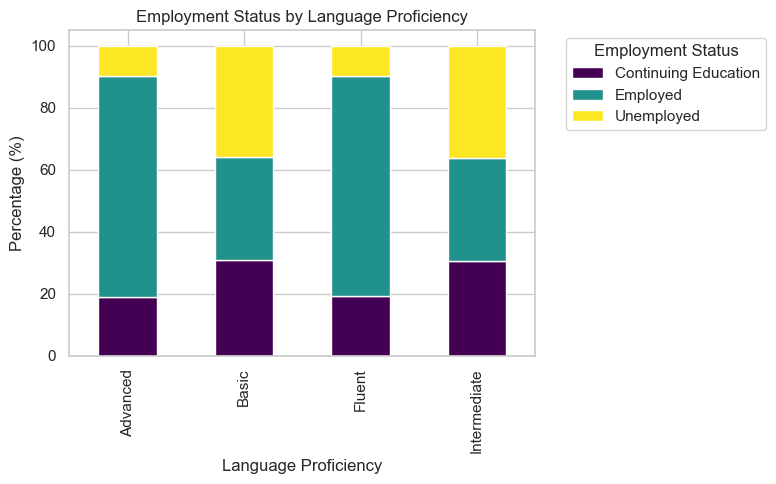

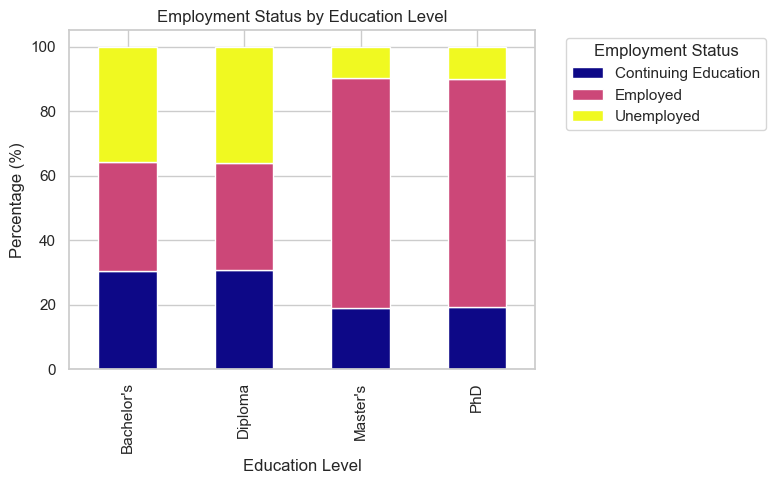

<Figure size 600x400 with 0 Axes>

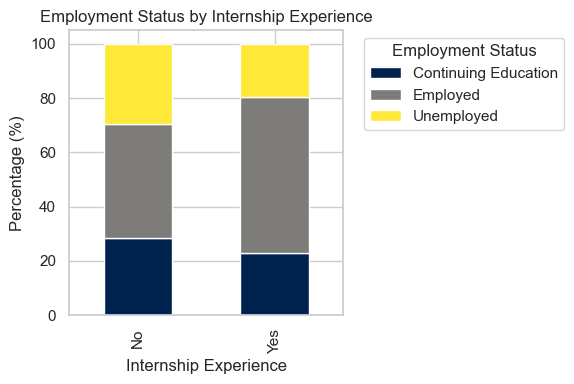

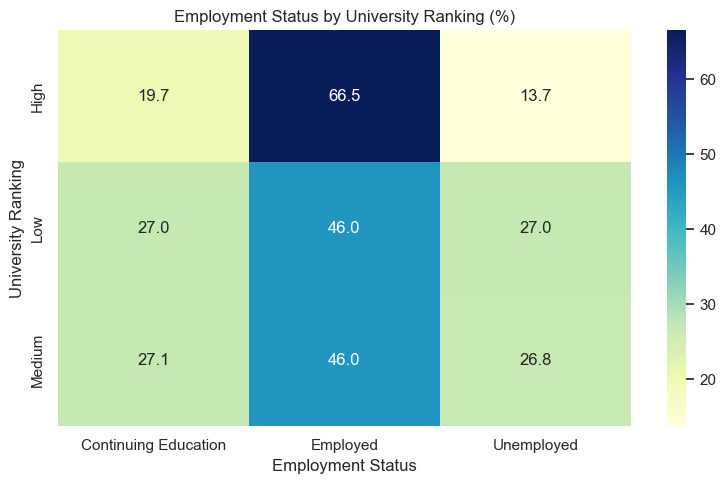

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use a clean style
sns.set(style="whitegrid")

# 1️⃣ Language Proficiency vs Employment Status
plt.figure(figsize=(8,5))
lang_emp = pd.crosstab(df['Language_Proficiency'], df['Employment_Status'], normalize='index') * 100
lang_emp.plot(kind='bar', stacked=True, colormap='viridis', figsize=(8,5))
plt.title('Employment Status by Language Proficiency')
plt.ylabel('Percentage (%)')
plt.xlabel('Language Proficiency')
plt.legend(title='Employment Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 2️⃣ Education Level vs Employment Status
edu_emp = pd.crosstab(df['Education_Level'], df['Employment_Status'], normalize='index') * 100
edu_emp.plot(kind='bar', stacked=True, colormap='plasma', figsize=(8,5))
plt.title('Employment Status by Education Level')
plt.ylabel('Percentage (%)')
plt.xlabel('Education Level')
plt.legend(title='Employment Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 3️⃣ Internship Experience vs Employment Status
plt.figure(figsize=(6,4))
intern_emp = pd.crosstab(df['Internship_Experience'], df['Employment_Status'], normalize='index') * 100
intern_emp.plot(kind='bar', stacked=True, colormap='cividis', figsize=(6,4))
plt.title('Employment Status by Internship Experience')
plt.ylabel('Percentage (%)')
plt.xlabel('Internship Experience')
plt.legend(title='Employment Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 4️⃣ University Ranking vs Employment Status (Heatmap)
plt.figure(figsize=(8,5))
uni_emp = pd.crosstab(df['University_Ranking'], df['Employment_Status'], normalize='index') * 100
sns.heatmap(uni_emp, annot=True, fmt='.1f', cmap='YlGnBu')
plt.title('Employment Status by University Ranking (%)')
plt.ylabel('University Ranking')
plt.xlabel('Employment Status')
plt.tight_layout()
plt.show()


# **One way Anova**

**1️⃣ Salary by Language Proficiency**

In [24]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# 1️⃣ Salary by Language Proficiency

model_lang = ols('Salary ~ C(Language_Proficiency)', data=df).fit()
anova_lang = sm.stats.anova_lm(model_lang, typ=2)


print("Language Proficiency ANOVA\n", anova_lang, "\n")


Language Proficiency ANOVA
                                sum_sq        df             F  PR(>F)
C(Language_Proficiency)  3.193073e+13       3.0  11770.561778     0.0
Residual                 2.712726e+14  299996.0           NaN     NaN 



# **Tukey**

In [25]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

tukey_lang = pairwise_tukeyhsd(
    endog=df['Salary'],
    groups=df['Language_Proficiency'],
    alpha=0.05
)
print(tukey_lang)


          Multiple Comparison of Means - Tukey HSD, FWER=0.05          
 group1     group2      meandiff  p-adj     lower       upper    reject
-----------------------------------------------------------------------
Advanced        Basic -19158.5268    0.0 -19565.8276 -18751.2259   True
Advanced       Fluent   3226.6491    0.0    2819.336   3633.9622   True
Advanced Intermediate -19267.4119    0.0 -19631.3389 -18903.4849   True
   Basic       Fluent  22385.1759    0.0   21938.702  22831.6497   True
   Basic Intermediate   -108.8851 0.9022   -516.1661    298.3958  False
  Fluent Intermediate  -22494.061    0.0 -22901.3542 -22086.7678   True
-----------------------------------------------------------------------


C:\Users\hp\AppData\Local\Temp\ipykernel_12800\1359822739.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Language_Proficiency', y='Salary', palette='Set2')
C:\Users\hp\AppData\Local\Temp\ipykernel_12800\1359822739.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=df, x='Language_Proficiency', y='Salary', color='black', estimator='mean', ci=None)


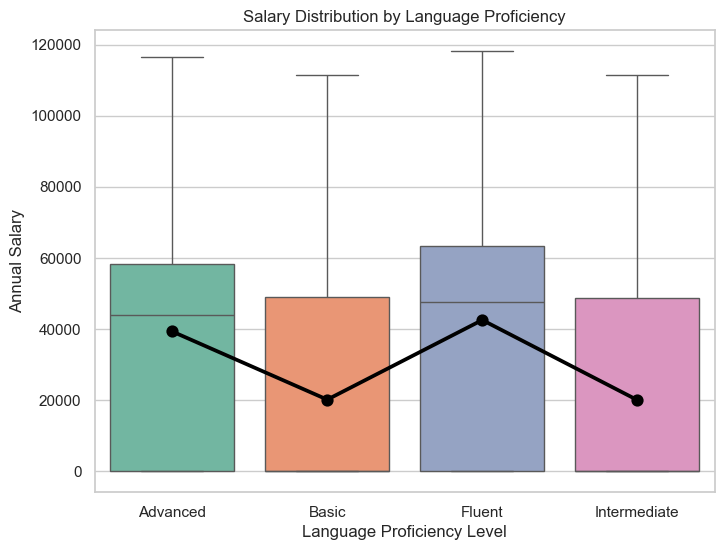

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Language_Proficiency', y='Salary', palette='Set2')
sns.pointplot(data=df, x='Language_Proficiency', y='Salary', color='black', estimator='mean', ci=None)
plt.title('Salary Distribution by Language Proficiency')
plt.ylabel('Annual Salary')
plt.xlabel('Language Proficiency Level')
plt.show()


**Salary by Education Level**

In [27]:
# 2️⃣ Salary by Education Level
model_edu = ols('Salary ~ C(Education_Level)', data=df).fit()
anova_edu = sm.stats.anova_lm(model_edu, typ=2)

print("Education Level ANOVA\n", anova_edu, "\n")



Education Level ANOVA
                           sum_sq        df             F  PR(>F)
C(Education_Level)  9.921151e+13       3.0  48634.406746     0.0
Residual            2.039918e+14  299996.0           NaN     NaN 



# **Tukey**

In [28]:
tukey_edu = pairwise_tukeyhsd(
    endog=df['Salary'],
    groups=df['Education_Level'],
    alpha=0.05
)
print(tukey_edu)


       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
  group1    group2   meandiff  p-adj   lower      upper    reject
-----------------------------------------------------------------
Bachelor's  Diploma -3159.5064   0.0 -3592.0258 -2726.9869   True
Bachelor's Master's 27098.0765   0.0  26815.082 27381.0711   True
Bachelor's      PhD 47509.6928   0.0 47139.0218 47880.3638   True
   Diploma Master's 30257.5829   0.0 29818.8907 30696.2751   True
   Diploma      PhD 50669.1992   0.0 50169.4373 51168.9611   True
  Master's      PhD 20411.6163   0.0 20033.7607 20789.4718   True
-----------------------------------------------------------------


C:\Users\hp\AppData\Local\Temp\ipykernel_12800\2169571144.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df, x='Education_Level', y='Salary', estimator='mean', ci='sd', palette='pastel')
C:\Users\hp\AppData\Local\Temp\ipykernel_12800\2169571144.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Education_Level', y='Salary', estimator='mean', ci='sd', palette='pastel')


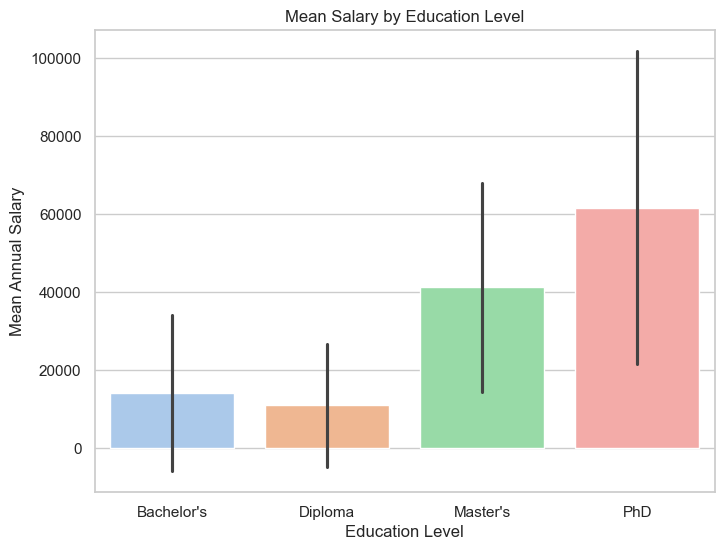

In [29]:
plt.figure(figsize=(8,6))
sns.barplot(data=df, x='Education_Level', y='Salary', estimator='mean', ci='sd', palette='pastel')
plt.title('Mean Salary by Education Level')
plt.ylabel('Mean Annual Salary')
plt.xlabel('Education Level')
plt.show()


**Salary by Internship Experience**

In [30]:
# 3️⃣ Salary by Internship Experience
model_int = ols('Salary ~ C(Internship_Experience)', data=df).fit()
anova_int = sm.stats.anova_lm(model_int, typ=2)
print("Internship Experience ANOVA\n", anova_int, "\n")

Internship Experience ANOVA
                                 sum_sq        df            F  PR(>F)
C(Internship_Experience)  7.131374e+12       1.0  7225.940295     0.0
Residual                  2.960719e+14  299998.0          NaN     NaN 



# **Tukey Not Applicable**

##### *Only applicable if Internship_Experience has more than 2 categories (e.g., “None,” “1 Internship,” “Multiple”).*
##### *If it’s just “Yes/No,” Tukey isn’t needed (a simple t-test covers that).*

C:\Users\hp\AppData\Local\Temp\ipykernel_12800\3922012678.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df, x='Internship_Experience', y='Salary', estimator='mean', ci='sd', palette='muted')
C:\Users\hp\AppData\Local\Temp\ipykernel_12800\3922012678.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Internship_Experience', y='Salary', estimator='mean', ci='sd', palette='muted')


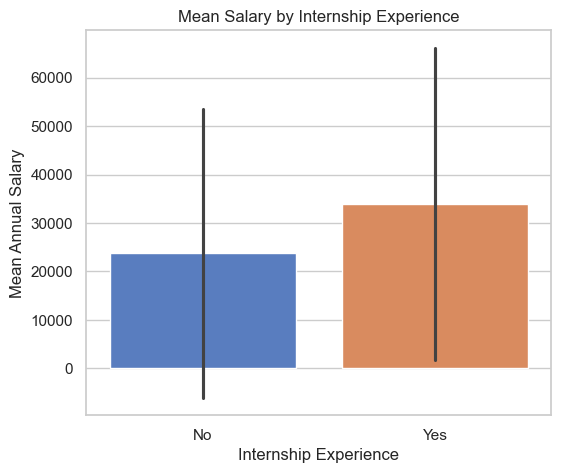

In [31]:
plt.figure(figsize=(6,5))
sns.barplot(data=df, x='Internship_Experience', y='Salary', estimator='mean', ci='sd', palette='muted')
plt.title('Mean Salary by Internship Experience')
plt.ylabel('Mean Annual Salary')
plt.xlabel('Internship Experience')
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_12800\827079144.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0], data=df, x='Language_Proficiency', y='Salary', palette='Set2')
C:\Users\hp\AppData\Local\Temp\ipykernel_12800\827079144.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(ax=axes[1], data=df, x='Education_Level', y='Salary', estimator='mean', ci='sd', palette='pastel')
C:\Users\hp\AppData\Local\Temp\ipykernel_12800\827079144.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], data=df, x='Education_Level', y='Salary', estimator='mean', ci='sd', palette='pastel')
C:\Users\hp\AppData\Local\Temp\ipyker

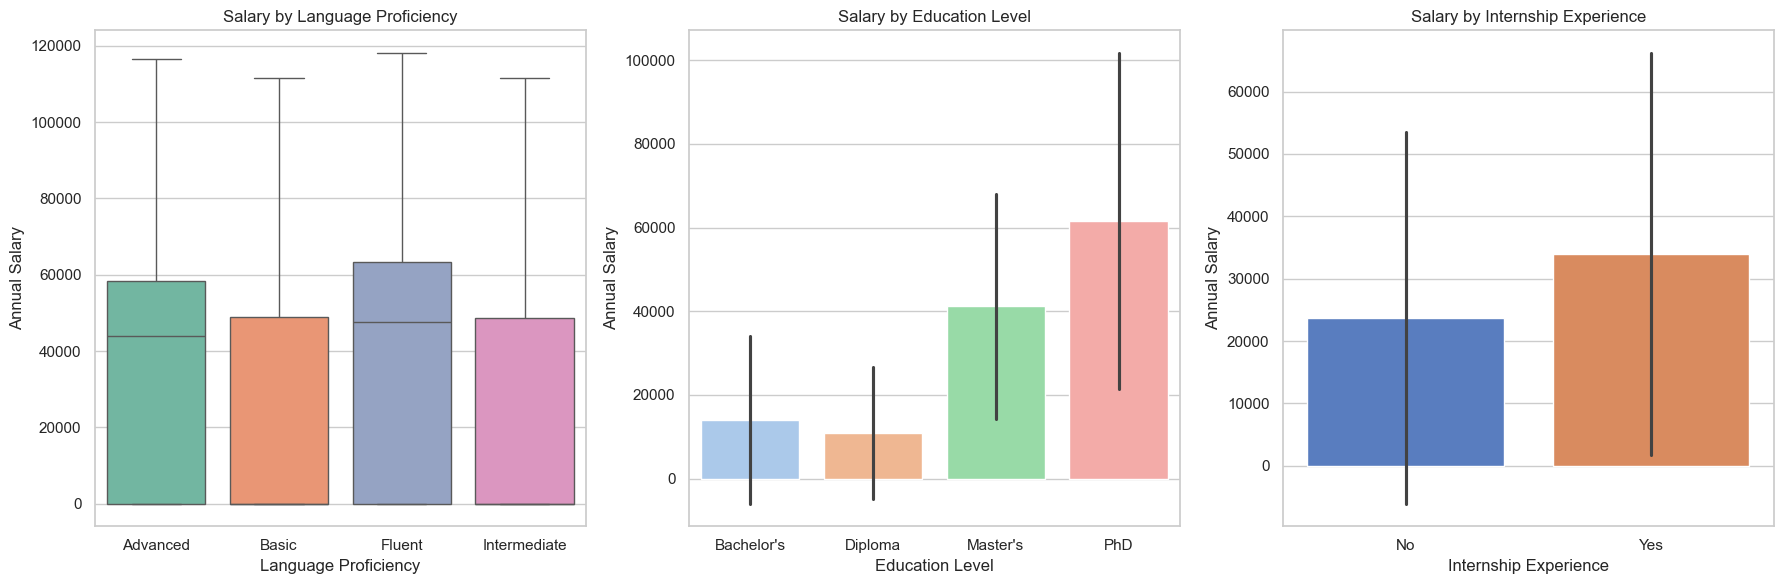

In [32]:
fig, axes = plt.subplots(1, 3, figsize=(18,6))

sns.boxplot(ax=axes[0], data=df, x='Language_Proficiency', y='Salary', palette='Set2')
axes[0].set_title('Salary by Language Proficiency')
axes[0].set_xlabel('Language Proficiency')

sns.barplot(ax=axes[1], data=df, x='Education_Level', y='Salary', estimator='mean', ci='sd', palette='pastel')
axes[1].set_title('Salary by Education Level')
axes[1].set_xlabel('Education Level')

sns.barplot(ax=axes[2], data=df, x='Internship_Experience', y='Salary', estimator='mean', ci='sd', palette='muted')
axes[2].set_title('Salary by Internship Experience')
axes[2].set_xlabel('Internship Experience')

for ax in axes:
    ax.set_ylabel('Annual Salary')

plt.tight_layout()
plt.show()


# **Two Way Anova**

### **Salary, Education_Level, Internship_Experience**

In [33]:
model_two = ols('Salary ~ C(Education_Level) * C(Internship_Experience)', data=df).fit()
anova_two = sm.stats.anova_lm(model_two, typ=2)
print(anova_two)


                                                   sum_sq        df  \
C(Education_Level)                           9.924371e+13       3.0   
C(Internship_Experience)                     7.163578e+12       1.0   
C(Education_Level):C(Internship_Experience)  8.495208e+11       3.0   
Residual                                     1.959787e+14  299992.0   

                                                        F         PR(>F)  
C(Education_Level)                           50638.708203   0.000000e+00  
C(Internship_Experience)                     10965.560974   0.000000e+00  
C(Education_Level):C(Internship_Experience)    433.464610  4.916951e-281  
Residual                                              NaN            NaN  


C:\Users\hp\AppData\Local\Temp\ipykernel_12800\2328232545.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(


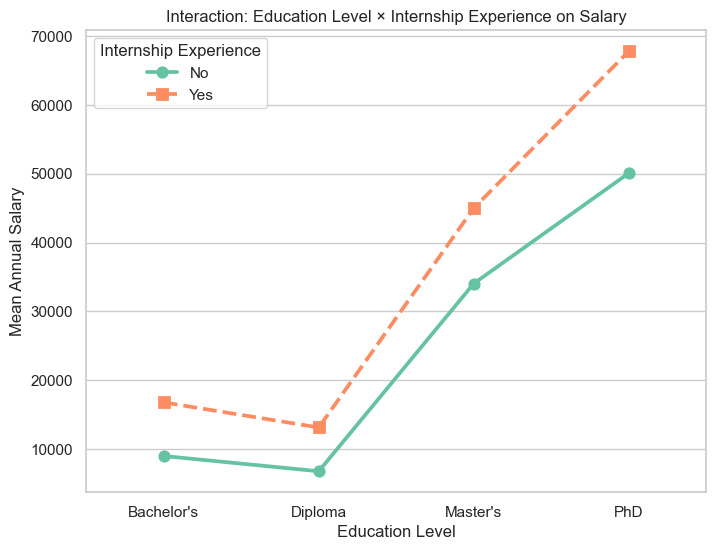

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.pointplot(
    data=df,
    x='Education_Level',
    y='Salary',
    hue='Internship_Experience',
    estimator='mean',
    ci=None,
    markers=['o', 's'],
    linestyles=['-', '--'],
    palette='Set2'
)
plt.title('Interaction: Education Level × Internship Experience on Salary')
plt.ylabel('Mean Annual Salary')
plt.xlabel('Education Level')
plt.legend(title='Internship Experience')
plt.show()


## **Salary, Education_Level,Language_Proficiency**

In [35]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Two-way ANOVA: Education Level × Language Proficiency → Salary
model_edu_lang = ols('Salary ~ C(Education_Level) * C(Language_Proficiency)', data=df).fit()
anova_edu_lang = sm.stats.anova_lm(model_edu_lang, typ=2)
print(anova_edu_lang)


                                                  sum_sq        df  \
C(Education_Level)                          9.903712e+13       3.0   
C(Language_Proficiency)                     3.175634e+13       3.0   
C(Education_Level):C(Language_Proficiency)  3.497057e+12       9.0   
Residual                                    1.687384e+14  299984.0   

                                                       F  PR(>F)  
C(Education_Level)                          58689.575027     0.0  
C(Language_Proficiency)                     18818.862570     0.0  
C(Education_Level):C(Language_Proficiency)    690.787473     0.0  
Residual                                             NaN     NaN  


C:\Users\hp\AppData\Local\Temp\ipykernel_12800\2574045025.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=df, x='Education_Level', y='Salary', hue='Language_Proficiency', ci=None)


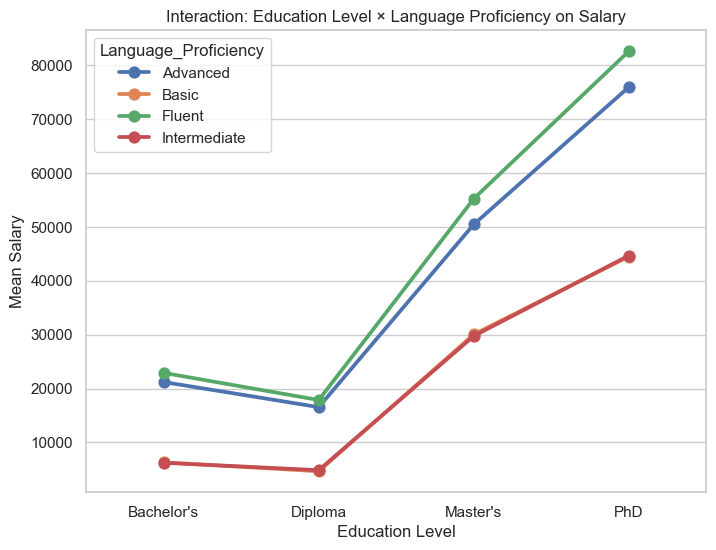

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.pointplot(data=df, x='Education_Level', y='Salary', hue='Language_Proficiency', ci=None)
plt.title('Interaction: Education Level × Language Proficiency on Salary')
plt.ylabel('Mean Salary')
plt.xlabel('Education Level')
plt.show()


In [37]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Two-way ANOVA: Education Level × Language Proficiency → Salary
model_edu_lang = ols('Salary ~ C(Education_Level) * C(Language_Proficiency)', data=df).fit()
anova_edu_lang = sm.stats.anova_lm(model_edu_lang, typ=2)
print(anova_edu_lang)

                                                  sum_sq        df  \
C(Education_Level)                          9.903712e+13       3.0   
C(Language_Proficiency)                     3.175634e+13       3.0   
C(Education_Level):C(Language_Proficiency)  3.497057e+12       9.0   
Residual                                    1.687384e+14  299984.0   

                                                       F  PR(>F)  
C(Education_Level)                          58689.575027     0.0  
C(Language_Proficiency)                     18818.862570     0.0  
C(Education_Level):C(Language_Proficiency)    690.787473     0.0  
Residual                                             NaN     NaN  


C:\Users\hp\AppData\Local\Temp\ipykernel_12800\3181268289.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=df, x='Education_Level', y='Salary', hue='Language_Proficiency', ci=None)


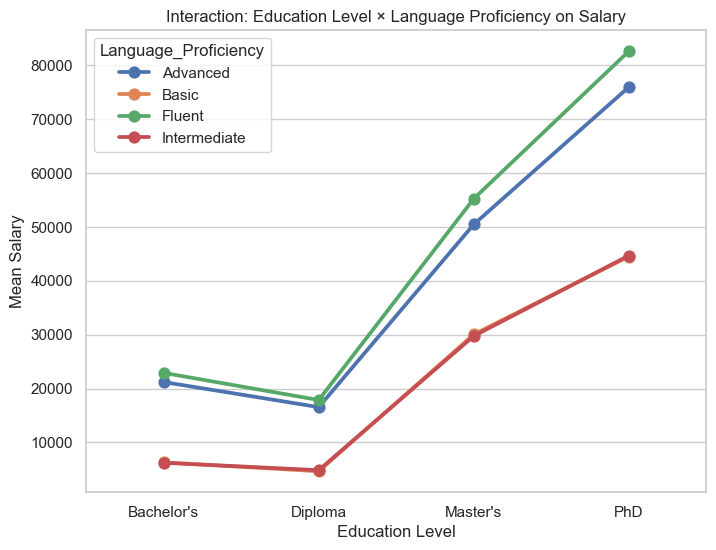

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.pointplot(data=df, x='Education_Level', y='Salary', hue='Language_Proficiency', ci=None)
plt.title('Interaction: Education Level × Language Proficiency on Salary')
plt.ylabel('Mean Salary')
plt.xlabel('Education Level')
plt.show()

In [39]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# --- 1. Two-Way ANOVA ---
# This model tests the main effects of each variable and their interaction
model_edu_lang = ols('Salary ~ C(Education_Level) * C(Language_Proficiency)', data=df).fit()
anova_edu_lang = sm.stats.anova_lm(model_edu_lang, typ=2)

print("--- Two-Way ANOVA Results (Salary ~ Education * Language) ---")
print(anova_edu_lang)
print("\n" + "="*60 + "\n")


# --- 2. Tukey HSD for the Interaction ---
# To test the interaction, we first create a new column that combines
# the categories from both Education_Level and Language_Proficiency.

df['Edu_Lang_Interaction'] = df['Education_Level'].astype(str) + " - " + df['Language_Proficiency'].astype(str)

# Now, perform the Tukey HSD test on this new interaction group
tukey_interaction = pairwise_tukeyhsd(
    endog=df['Salary'],
    groups=df['Edu_Lang_Interaction'],
    alpha=0.05
)

print("--- Tukey HSD for Education * Language Interaction ---")
print(tukey_interaction.summary())

--- Two-Way ANOVA Results (Salary ~ Education * Language) ---
                                                  sum_sq        df  \
C(Education_Level)                          9.903712e+13       3.0   
C(Language_Proficiency)                     3.175634e+13       3.0   
C(Education_Level):C(Language_Proficiency)  3.497057e+12       9.0   
Residual                                    1.687384e+14  299984.0   

                                                       F  PR(>F)  
C(Education_Level)                          58689.575027     0.0  
C(Language_Proficiency)                     18818.862570     0.0  
C(Education_Level):C(Language_Proficiency)    690.787473     0.0  
Residual                                             NaN     NaN  


--- Tukey HSD for Education * Language Interaction ---
                         Multiple Comparison of Means - Tukey HSD, FWER=0.05                         
          group1                    group2            meandiff  p-adj     lower       upper  